# Les CART

## Overview

Ce cours a pour but de vous faire comprendre les principes théoriques des arbres de décision et de vous faire coder un exemple simple d'application. 

Les arbres de decisions s’inscrivent dans le champ des méthodes de partitionnement récursif, qu’on connait plutôt sous l’acronyme CART (Classification And Regression Tree) qui permettent d’établir des règles successives permettant de classer des observations ou de faire des régressions.

On parle de **classification lorsque la variable cible est qualitative (catégorielle)**, cas que nous traiterons dans un second temps. Dans cette introduction nous nous intéressons au Regression Trees qui interviennent dans le cas d’une variable cible quantitative. Leur avantage réside notament dans leur représentation graphique aisément lisible ce qui en fait de bons choix pour modéliser des problématiques buisiness. 

Un arbre est composé de trois types d’éléments :

*   La racine, où réside l’ensemble des données d’apprentissage.
*   Les noeuds/branches, qui représente les points à partir de la racine où les données sont séparées en deux groupes selon un critère lié aux variables explicatives.
*   Les feuilles, qui sont les noeuds terminaux de l’arbre et auxquels sont associés un valeur dans le cas où ***Y*** est quantitative et une classe lorsque ***Y*** est qualitative.

Ainsi à partir de la racine on défini un noeud qui divise l’ensemble des données selon un critère lié à une variable explicative, pour chacune des deux branches ainsi créées on répète le même procédé, et ainsi de suite jusqu’à ce qu’aucune division ne satisfasse le critère de construction d’un noeud et on définit alors un noeud terminal ou feuille.

![CART.png](CART.png)


Voilà un exemple d’arbre avec en haut la racine et la première division et l’enchaînement des branches, jusqu’aux feuilles. Par ailleurs, on constate immédiatement l’aspect très clair et visuel de l’arbre.
Imaginons que nous avons un programme qui demande trois valeurs à  un utilisateur et qui a pour but de classer ces trois valeurs. Pour répondre au problème on utilise un arbre de décision comme celui ci-dessus. 

Voyons comment lire cette représentation en arbre, pour cela il faut commencer par regarder le noeud tout en haut et vérifier si la condition s’applique. Comme indiqué sur le schéma, si oui nous allons a gauche vers le noeud inférieure vérifier (ou non) la nouvelle condition. Et cela jusqu'à qu’il n’existe plus de noeud inférieur. 

Pour se faire cet algorithme a besoin de plusieurs choses :

- Un critère de sélection de la meilleure division
- Une règle pour définir si un noeud est terminal
- Une méthode pour assigner à chaque feuille une valeur ou une classe


## La notation mathématique du problème : le critère de division

Comme énoncé dans la partie précédente afin de construire un arbre de décision il nous faut un critère de sélection de la meilleure division pour un noeud. 

Un noeud est admissible si les branches qui en découlent portent des noeuds non vide (c’est à dire qu’au moins une observation appartient à chacun des noeuds enfant). Pour un noeud parent contenant M observations il existe M - 1 divisions admissibles si la variables sélectionnée pour la division est quantitative ou qualitative ordinale, et  divisions admissibles si la variable sélectionnée est nominale.

Afin de sélectionner la meilleure division admissible, on construit une fonction d’hétérogénéité qui présente deux propriétés remarquables :

- Elle vaut zéro lorsque tous les individus appartiennent à la même modalité ou présentent la même valeur de Y.
- Elle est maximale lorsque les valeurs de Y sont équiréparties dans le noeud.

On cherche donc la division qui minimise la somme des hétérogénéités des noeuds enfants.


## La notation mathématique du problème : le critère d’arrêt

Un noeud donné sera terminal lorsqu’il est homogène, c’est à dire que toutes les observations dans le noeud présente la même valeur ou la même modalité de Y, lorsqu’il n’existe plus de divisions admissibles, ou bien lorsque le nombre d’observations dans le noeud est inférieur à une valeur définie à l’avance, en général de l’ordre de quelques unités.

**Dans le cas ou Y est une variable quantitative** 
Dans le cas de la régression, l’hétérogénéité du noeud k s’écrit de la manière suivante :

$$H_k=\frac{1}{Card(k)}\cdot\sum_{i\in{k}}(y_i-\bar{y_k})^2$$ 

$Card(k)$ parfois aussi noté `#(k)` ou encore $|k|$ est le nombre d’éléments dans le noeud $k$, et $\bar{y}_k$ est la moyenne des valeurs de $Y$ parmi les observations du noeud $k$. Ce qui fait la variance du noeud $k$. La division retenue est celle pour laquelle : $H_{kG}+H_{kD}$ la somme de l’hétérogénéité de la branche gauche et de la branche droite est minimale. Car rappelons le **l’objectif est de partager les individus en deux groupes les plus homogènes par rapport à notre variable cible**. Cela peut parraitre complexe mais vous aller voir les outils python nous facilitent beaucoup la tâche. 


**Dans le cas ou Y est une variable qualitative** 
Soit Y une variable qualitative à m modalités ou catégories numérotées de 1 à m. La fonction d’hétérogénéité privilégiée la plupart du temps est la concentration de GINI qui se note de la façon suivante :

$$H_k=\sum_{i=1}^{m}p_{k}^{i}\cdot(1-p_{k}^{i})$$

Où $p^i_k$ est la proportion des individus de la classe $i$ de $Y$ dans le noeud $k$.

Comme précédemment, il s’agit pour chaque nœud de rechercher, parmi les divisions admissible, celle qui maximise la décroissance de l’hétérogénéité.


## L’élagage d’un arbre

Le problème des modèles de régression comme LASSO et RIDGE est qu’il y a un risque comme dans tout problème d’apprentissage supervisé qui est celui du sur-apprentissage.

Pour rappel, le sur-apprentissage signifie que votre algorithme c’est tellement entraîné sur vos données qu’il perd sa capacité à généraliser ses prédictions. Le critère d’arrêt défini pour la construction de l’arbre est souvent propice au sur-apprentissage puisqu’il est très probables que la plupart des feuilles de l’arbre ne contiennent que quelques observations, nous allons illustrer cette exemple plus tard.

Ainsi l’arbre de décision tel quel sera très instable, son biais est quasi-nul voir nul par définition, il dépend très fortement des observations de la base d’apprentissage et sera potentiellement peu généralisable aux nouvelles données.

Notre problème est donc de trouver un arbre intermédiaire qui vérifie un compromis biais variance intéressant pour les besoins de l’estimation de $Y$. C’est pour cela que nous allons voir les forets aléatoires (en ensemble d’arbres) qui vont justement répondre à ce problème. Nous allons voir les forets aléatoires dans la partie suivante pas de panique. 


### Le critere de GINI 

The Gini index, also known as the Gini coefficient or Gini impurity, is a **measure of inequality or impurity in a dataset**. In the context of decision trees, it's **used to quantify the impurity of a node, which in turn helps us determine the best feature to split the dataset on**. 

The Gini index ranges between 0 and 1, with 0 representing perfect purity (all instances in a node belong to a single class) and 1 representing maximum impurity (instances are distributed uniformly across all classes).

The CART algorithm can uses the Gini index to choose the best split at each node of the tree. The algorithm calculates the Gini index for each potential split and selects the split that results in the lowest weighted Gini index.

#### Exemple de code `gini_index` function 

Now let's dive into some Python examples to illustrate these concepts. First, we'll start with a simple function to calculate the Gini index of a dataset:


In [2]:
def gini_index(groups, classes):
    total_instances = sum([len(group) for group in groups])
    gini = 0.0
    
    for group in groups:
        group_size = len(group)
        if group_size == 0:
            continue
        
        score = 0.0
        for class_val in classes:
            proportion = [row[-1] for row in group].count(class_val) / group_size
            score += proportion * proportion
        
        gini += (1 - score) * (group_size / total_instances)
    
    return gini

#Now let's consider a toy dataset with two features and a binary class label (A,B)

dataset = [
    [1, 1, 'A'],
    [1, 2, 'A'],
    [2, 1, 'B'],
    [2, 2, 'B'],
    [3, 1, 'A'],
    [3, 2, 'A'],
    [4, 1, 'B'],
    [4, 2, 'B'],
]


We can now use our `gini_index()` function to evaluate the Gini index for different splits:

In [3]:
# Example splits:
# Split 1: [1, 1, 'A'], [1, 2, 'A'] | [2, 1, 'B'], [2, 2, 'B'], [3, 1, 'A'], [3, 2, 'A'], [4, 1, 'B'], [4, 2, 'B']
# Split 2: [1, 1, 'A'], [1, 2, 'A'], [2, 1, 'B'], [2, 2, 'B'] | [3, 1, 'A'], [3, 2, 'A'], [4, 1, 'B'], [4, 2, 'B']

split1 = (dataset[:2], dataset[2:])
split2 = (dataset[:4], dataset[4:])
classes = list(set(row[-1] for row in dataset))

print("Gini index for split 1:", gini_index(split1, classes))
print("Gini index for split 2:", gini_index(split2, classes))


Gini index for split 1: 0.3333333333333333
Gini index for split 2: 0.5


In this case, the second split results in a Gini index of 0, which means it perfectly separates the classes. The CART algorithm would choose the minimal possible value for a split. 


### Other CART split metrics for classification  

In addition to the Gini index, there are other metrics used for splitting nodes in decision trees. Two popular alternatives are `Information Gain` and `Gain Ratio`. Let's discuss each of them.

#### Information Gain

Information Gain is based on the concept of entropy, which measures the impurity of an input set. In the context of decision trees, it measures the reduction in entropy achieved by partitioning a dataset based on a particular feature. The attribute with the highest Information Gain is selected as the splitting attribute.

Entropy is calculated using the following formula:

$$ Entropy(S) = -Σ P(c) * log2(P(c))$$

Where S is the dataset, c represents a class, and P(c) is the proportion of instances belonging to class c.

Information Gain is calculated as:

$$ InformationGain(S, A) = Entropy(S) - Σ (|Sv| / |S|) * Entropy(Sv) $$


Where S is the dataset, A is the attribute we are considering, Sv is the subset of S where the attribute A has value v, and $|Sv| / |S|$ is the proportion of instances in Sv. 

#### Gain Ratio

The Gain Ratio is an extension of Information Gain that takes into account the intrinsic information of an attribute. It is useful in dealing with the bias of Information Gain towards attributes with more distinct values.

Gain Ratio is calculated as:

$$ GainRatio(S, A) = InformationGain(S, A) / SplitInformation(S, A) $$

Where SplitInformation(S, A) is the entropy of the attribute A.

Now, let's discuss the differences between Gini and other metrics:

- Gini index and Information Gain both measure impurity reduction, but Gini index is based on the probability of misclassifying an instance, while Information Gain is based on the concept of entropy. In general, Gini index tends to be more efficient computationally, while Information Gain can be more accurate in some cases.
- Gain Ratio addresses the bias of Information Gain towards attributes with more distinct values. It normalizes the Information Gain by considering the intrinsic information of the attribute.
- The choice of impurity measure may impact the structure of the resulting decision tree. However, in practice, the choice between Gini index, Information Gain, and Gain Ratio often leads to similar decision trees, and the performance differences are generally small.

It's important to experiment with different impurity measures and evaluate their impact on the performance of the decision tree for a specific dataset or problem.

### CART metrics for regression 

In the case of regression trees, CART uses different metrics to measure the quality of a split. Instead of measuring impurity like in classification, it measures the variation in the target variable. Two common metrics for regression trees are Mean Squared Error (MSE) and Mean Absolute Error (MAE).

We already seen the concept of MSE in the regression course, let's try to code it in a simple way in order to illustrate the difference between MSE and MAE on a simple toy test dataset. 

The MAE measures the average absolute difference between the predicted and true target values. Like the MSE, it is calculated as:

$$MAE = (1 / N) * Σ |y_i - y_pred|$$

Let's code this : 

In [6]:
def mean_absolute_error(groups):
    total_instances = sum([len(group) for group in groups])
    mae = 0.0
    
    for group in groups:
        group_size = len(group)
        if group_size == 0:
            continue

        group_mean = sum([row[-1] for row in group]) / group_size
        group_mae = sum([abs(row[-1] - group_mean) for row in group]) / group_size
        mae += group_mae * (group_size / total_instances)
    
    return mae


def mean_squared_error(groups):
    total_instances = sum([len(group) for group in groups])
    mse = 0.0

    for group in groups:
        group_size = len(group)
        if group_size == 0:
            continue

        group_mean = sum([row[-1] for row in group]) / group_size
        group_mse = sum([(row[-1] - group_mean) ** 2 for row in group]) / group_size
        mse += group_mse * (group_size / total_instances)

    return mse


#Now, let's consider a toy dataset with two features and a continuous target variable for the MAE illustration

dataset = [
    [1, 1, 10],
    [1, 2, 12],
    [2, 1, 20],
    [2, 2, 22],
    [3, 1, 30],
    [3, 2, 32],
    [4, 1, 40],
    [4, 2, 42],
]

# Example splits:
# Split 1: [1, 1, 10], [1, 2, 12] | [2, 1, 20], [2, 2, 22], [3, 1, 30], [3, 2, 32], [4, 1, 40], [4, 2, 42]
# Split 2: [1, 1, 10], [1, 2, 12], [2, 1, 20], [2, 2, 22] | [3, 1, 30], [3, 2, 32], [4, 1, 40], [4, 2, 42]

split1 = (dataset[:2], dataset[2:])
split2 = (dataset[:4], dataset[4:])

print("Mean Absolute Error for split 1:", mean_absolute_error(split1))
print("Mean Absolute Error for split 2:", mean_absolute_error(split2))


Mean Absolute Error for split 1: 5.5
Mean Absolute Error for split 2: 5.0


In this example, the second split results in a lower MAE, indicating that it's a better split for the regression problem.

**Now, let's create a toy dataset of points and calculate the MAE and MSE for various splits and compare the results.**

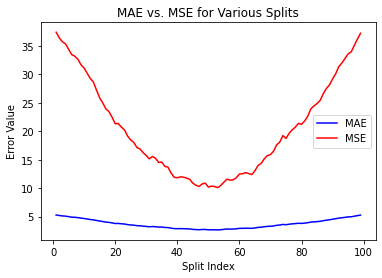

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Create a toy dataset
np.random.seed(42)
x = np.linspace(0, 10, 100)
y = 2 * x + 1 + np.random.normal(0, 2, len(x))

dataset = list(zip(x, y))

# Calculate the MAE and MSE for various splits
mae_values = []
mse_values = []
splits = np.arange(1, len(dataset))

for split_idx in splits:
    split1 = dataset[:split_idx]
    split2 = dataset[split_idx:]
    mae_values.append(mean_absolute_error([split1, split2]))
    mse_values.append(mean_squared_error([split1, split2]))

# Plot the MAE and MSE values
plt.plot(splits, mae_values, color='blue', label='MAE')
plt.plot(splits, mse_values, color='red', label='MSE')
plt.xlabel('Split Index')
plt.ylabel('Error Value')
plt.legend()
plt.title('MAE vs. MSE for Various Splits')
plt.show()


This code generates a toy dataset of points along a line with some random noise. It then calculates the MAE and MSE for various splits and plots the error values on a single graph with two distinct colors. The graph demonstrates how MAE and MSE values change depending on the chosen split.

**The main difference between MAE and MSE is how they penalize large errors. MSE squares the errors, which makes larger errors more prominent in the final error value. In contrast, MAE treats all errors linearly. As a result, MSE is more sensitive to outliers, while MAE is more robust to them.** 

The choice between MAE and MSE depends on the problem at hand and whether it's more important to penalize large errors or maintain robustness to outliers.

## Exemple avec des données simulées

Commencons par coder un petit exemple afin de comprendre le fonctionnement d'un arbre dans le cadre de la régression : estimer une fonction sinus. 

Si le mot sinus vous rappelle des mauvais souvenirs d’école, sachez que les fonctions sinusoïdales sont loin d'être des notions abstraites, elles sont partout dans ce qui nous entoure comme le déplacement des ondes, la simulation de vibrations pour tester la résistance des matériaux et bien d’autres choses encore 🤓


### Simulation des données

Pour cet exemple, nous simulons une fonction sinus avec des bruits aléatoires et indépendants.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [12]:
# construisons notre dataset exemple 
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
# on ajoute du bruit afin d'avoir de meilleurs données 
y[::5] += 3 * (0.5 - rng.rand(16))

## L’importance de la variation d’ un hyperparamètre dans l'arbres de régression

Comme on l’a vu précédemment, ici nous cherchons à estimer notre varible cible `Y` (une fonction sinus) avec des données `X` 🤓

La première chose que nous allons commencer par comprendre le fonctionnement d’un hyperparamètre dans le cas  d'un arbre de régression. Un hyperparamètre est un parametre dont la valeur est utilisée pour controler le procesus d'apprentissage.

Pour bien comprendre cette notion, nous allons créer 4 arbres de régression ayant une profondeur (notre hyperparametre) différente, respectivement 2, 3, 4 et 6. Pour chacun des arbres :

- On crée l'objet *scikit-learn* permettant d'effectuer une régression sur nos données avec un arbre de décision
- On optimise (fit) l'arbre sur nos données
- On prédit (predict) l'arbre sur des données simulées

In [13]:
# Fit regression model
regressors = []
depths = [2, 3, 4, 6]
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
Y_test = []
for p in depths:
    reg = DecisionTreeRegressor(max_depth=p)  # Création d'un arbre de régression de profondeur p
    reg.fit(X, y)  # Processus d'optimisation de l'arbre
    Y_test.append(reg.predict(X_test))  # On prédit sur les données et on ajoute à la liste des valeurs prédites
    regressors.append(reg)

Enfin, nous pouvons afficher les données d'entrées et les valeurs prédites pour chaqun de nos arbres.

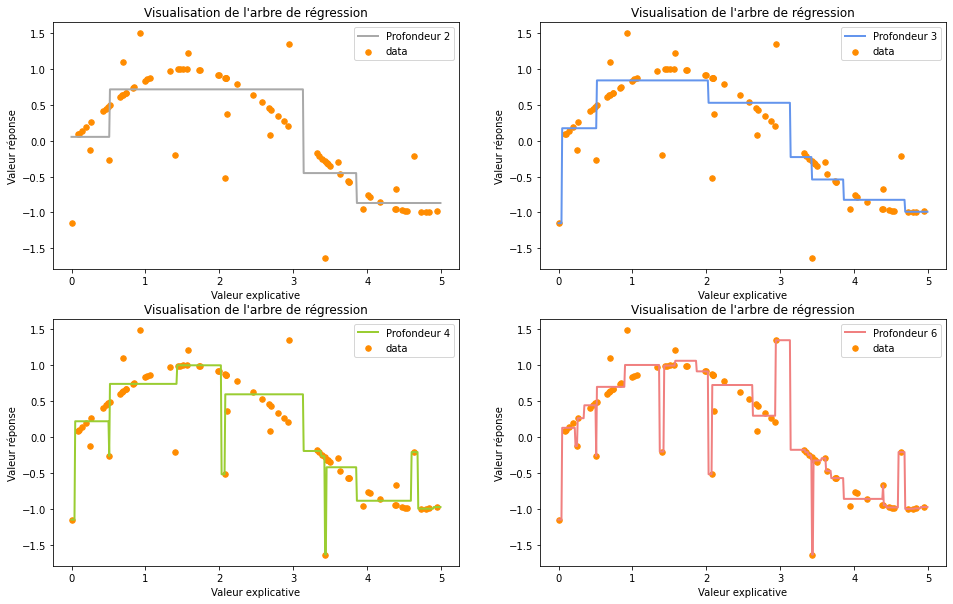

In [14]:
#plot option
plt.figure(figsize=(16, 10))
colors = [ "darkgray", "cornflowerblue", "yellowgreen", "lightcoral"]

#for loop to print all the trees
for i, reg in zip(range(len(regressors)), regressors):
    #define the figure inside the subplot 
    plt.subplot(220 + i + 1)
    plt.plot(X_test, Y_test[i], color=colors[i], label="Profondeur {0}".format(depths[i]), linewidth=2)
    #plot the data in the figure
    plt.scatter(X, y, s=30, c="darkorange", label="data")
    #plot otpions 
    plt.xlabel("Valeur explicative")
    plt.ylabel("Valeur réponse")
    plt.title("Visualisation de l'arbre de régression")
    plt.legend()
#save the figure     
plt.savefig("deep_illustration.png")
plt.show()

## Explication théorique 

On ne considère que l'arbre de profondeur $d=2$. Si $d=2$, alors il y a $3$ **splits** (ou coupures), notés $t_1, t_2$ et $t_3$. Commençons par le début :

Initialement, il n'y a pas de coupure. On s'interroge donc à comment calculer $t_1$, pour obtenir la règle $X \leq t_1$. Pour cela, on doit introduire une **métrique de perte**, c'est-à-dire une fonction qui nous indique si la coupure est bonne ou pas. Tout comme pour la régression linéaire, nous avons envie de considérer la distance des moindres carrés entre la valeur théorique $y$ et la valeur prédire $\hat{y}$. On veut donc couper de sorte à **minimiser** cette perte quadratique à gauche de $t_1$, mais également à droite de $t_1$.

Soyons plus formel. Appelons $R_G = \{ X : X \leq t_1 \}$ l'ensemble à gauche de $t_1$ et $R_D=\{ X : X > t_1 \}$ l'ensemble à droite de $t_1$. On a dit vouloir minimiser la perte quadratique, c'est-à-dire résoudre

$$\min_{t_1 \in \mathbb{R}} \sum_{i=1}^n (y_i-\hat{y})$$

Problème : $t_1$ n'intervient pas dans la somme ! Puisqu'il s'agit d'un split, il faut à la fois considérer lorsque le point est soit dans $R_G$, soit dans $R_D$. De plus, puisque l'on veut attribuer un poids à chaque noeud, qui ici définira la valeur prédite $\hat{y}$, nous devons introduire $c_G$ et $c_D$, que l'on interprète comme ceci :

- Tous les points $X$ qui appartiennent à $R_G$ (soit inférieurs à $t_1$) auront pour valeur prédite $c_G$.
- Tous les points $X$ qui appartiennent à $R_D$ (soit strictement supérieurs à $t_1$) auront pour valeur prédite $c_D$.

Mais ces poids doivent aussi être optimisés afin d'être calibré selon nos données. Dès lors, on obtient une formule beaucoup plus applicable numériquement :

$$\min_{t_1 \in \mathbb{R}} \left(\min_{c_G \in \mathbb{R}} \sum_{x_i \in R_G} (y_i-c_G)^2 +\min_{c_D \in \mathbb{R}} \sum_{x_i \in R_D} (y_i-c_D)^2 \right)$$

On peut simplifier le problème tel que :

$$\min_{t_1 \in \mathbb{R}} \left( \sum_{x_i \in R_G} (y_i-\hat{c_G})^2 + \sum_{x_i \in R_D} (y_i-\hat{c_D})^2 \right)$$

## Questions 🤔

- Comparez les graphiques obtenus et déduire le rôle de l'hyperparamètre profondeur `max_depth` ? 
- Expliquer le phénomène de sous-apprentissage à l'aide des graphiques ci-dessus, pour quelle valeur de `max_depth` notre algorithme est en sous-apprentissage? 
- Expliquer le phénomène de sur-apprentissage à l'aide des graphiques ci-dessus pour quelle valeur de `max_depth` notre algorithme est en sur-apprentissage? 
- Finalement, quelle est la meilleur valeur pour l'hyperparamètre profondeur `max_depth` ? 

# CART cooding from scratch 

The objective of this project is to build a custom CART Decision Tree Regressor from scratch without relying on external libraries like Scikit-learn 😃

The regressor will be implemented in Python and should be able to handle simple regression tasks.

## Project Outline

- Understand the CART algorithm and its components.
- Implement the DecisionTreeRegressor class.
- Write functions for splitting the data and calculating the errors.
- Visualize the performance of the custom regressor on a toy dataset.

First let's define a `DecisionTreeRegressor` class, which has an optional parameter `max_depth` that determines the maximum depth of the decision tree. If max_depth is not specified, the tree can grow without depth restrictions.

In [15]:
class DecisionTreeRegressor:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

Now let's create a Node class. The Node class represents a node in the decision tree. It has a constructor `__init__(self, left=None, right=None, value=None, split_feature=None, split_value=None)` which initializes the node object with left and right child nodes, the node's value, and the split feature and value (for non-leaf nodes).

In [16]:
class Node:
    def __init__(self, left=None, right=None, value=None, split_feature=None, split_value=None):
        self.left = left
        self.right = right
        self.value = value
        self.split_feature = split_feature
        self.split_value = split_value


Now let's define some important concepts : 

- The `fit(self, X, y)` takes the input features (X) and the target variable (y) as arguments, and builds the decision tree by calling the _build_tree helper function.
- The `predict(self, X)` method takes an array of input features (X) and returns the predicted target variable for each input by calling the `_predict_single` helper function.
- The `_build_tree(self, X, y, depth)` helper function is a recursive function that builds the decision tree by finding the best split for the data and creating child nodes until the stopping criteria (maximum depth) are met. It takes the input features X, target variable y, and the current depth of the tree. If the current depth exceeds max_depth or there is no optimal feature to split on, it creates a leaf node with the mean value of y. Otherwise, it calculates the best feature and value to split the data, creates left and right child nodes, and recurses on both subsets of the data.
- The `_find_best_split(self, X, y)` helper function finds the best feature and value to split the data on by minimizing the mean squared error (MSE). It iterates through all possible features and split values, calculates the MSE for each split, and returns the best feature and split value that result in the lowest MSE.
- The `_predict_single(self, x)` helper function takes a single input feature vector x and predicts the target variable for it. It traverses the decision tree from the root, following the left or right child nodes based on the split feature and value, until it reaches a leaf node. The value of the leaf node is the predicted target variable.

In [25]:
#entier code 
import numpy as np

# Define the main DecisionTreeRegressor class
class DecisionTreeRegressor:
    # Class constructor with an optional parameter `max_depth` for the maximum depth of the tree
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    # Define the inner Node class representing a node in the decision tree
    class Node:
        # Node class constructor with parameters for the left and right child nodes, value, split feature, and split value
        def __init__(self, left=None, right=None, value=None, split_feature=None, split_value=None):
            self.left = left
            self.right = right
            self.value = value
            self.split_feature = split_feature
            self.split_value = split_value

    # `fit` method takes the input features (X) and target variable (y) and builds the decision tree
    def fit(self, X, y):
        self.root = self._build_tree(X, y, 0)

    # `predict` method takes input features (X) and returns predictions for each input
    def predict(self, X):
        return [self._predict_single(x) for x in X]

    # Recursive helper function `_build_tree` for building the decision tree
    def _build_tree(self, X, y, depth):
        if len(y) == 0:
            return None

        if self.max_depth is not None and depth >= self.max_depth:
            return self.Node(value=np.mean(y))

        split_feature, split_value = self._find_best_split(X, y)
        if split_feature is None:
            return self.Node(value=np.mean(y))

        left_mask = X[:, split_feature] <= split_value
        right_mask = ~left_mask

        left_node = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        right_node = self._build_tree(X[right_mask], y[right_mask], depth + 1)

        return self.Node(left=left_node, right=right_node, split_feature=split_feature, split_value=split_value)

    # Helper function `_find_best_split` to find the best feature and value to split the data
    def _find_best_split(self, X, y):
        best_mse = float("inf")
        best_split_feature = None
        best_split_value = None

        for feature in range(X.shape[1]):
            feature_values = X[:, feature]
            for value in feature_values:
                left_mask = feature_values <= value
                right_mask = ~left_mask

                left_y = y[left_mask]
                right_y = y[right_mask]

                if len(left_y) <= 1 or len(right_y) <= 1:
                    continue

                mse = len(left_y) * np.var(left_y) + len(right_y) * np.var(right_y)
                if mse < best_mse:
                    best_mse = mse
                    best_split_feature = feature
                    best_split_value = value

        return best_split_feature, best_split_value

    # Helper function `_predict_single` for predicting the target variable for a single input feature vector
    def _predict_single(self, x):
        node = self.root
        while node.left is not None and node.right is not None:
            if x[node.split_feature] <= node.split_value:
                node = node.left
            else:
                node = node.right

        return node.value


Now let's generate our toy sample dataset then apply our `DecisionTreeRegressor` class :

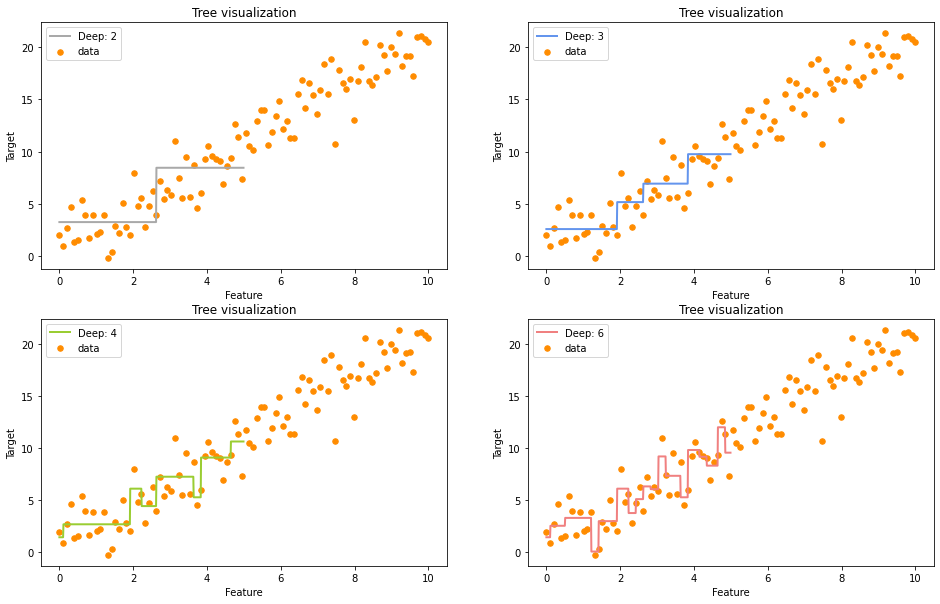

In [27]:
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.linspace(0, 10, 100)[:, np.newaxis]
y = 2 * X.ravel() + 1 + np.random.normal(0, 2, len(X))

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

regressors = []
depths = [2, 3, 4, 6]
Y_test = []
for p in depths:
    reg = DecisionTreeRegressor(max_depth=p)
    reg.fit(X, y)
    Y_test.append(reg.predict(X_test))
    regressors.append(reg)

plt.figure(figsize=(16, 10))
colors = ["darkgray", "cornflowerblue", "yellowgreen", "lightcoral"]

# for loop to print all the trees
for i, reg in zip(range(len(regressors)), regressors):
    # define the figure inside the subplot
    plt.subplot(220 + i + 1)
    plt.plot(X_test, Y_test[i], color=colors[i], label="Deep: {0}".format(depths[i]), linewidth=2)
    # plot the data in the figure
    plt.scatter(X, y, s=30, c="darkorange", label="data")
    # plot options
    plt.xlabel("Feature")
    plt.ylabel("Target")
    plt.title("Tree visualization")
    plt.legend()

# save the figure
plt.savefig("deep_illustration.png")
plt.show()

